In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("fetal_health.csv")
df.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


In [5]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [8]:
for i in df.columns:
    x=df[i].nunique()
    print("{} ---> consist :: {}".format(i,x))

baseline value ---> consist :: 48
accelerations ---> consist :: 20
fetal_movement ---> consist :: 102
uterine_contractions ---> consist :: 16
light_decelerations ---> consist :: 16
severe_decelerations ---> consist :: 2
prolongued_decelerations ---> consist :: 6
abnormal_short_term_variability ---> consist :: 75
mean_value_of_short_term_variability ---> consist :: 57
percentage_of_time_with_abnormal_long_term_variability ---> consist :: 87
mean_value_of_long_term_variability ---> consist :: 249
histogram_width ---> consist :: 154
histogram_min ---> consist :: 109
histogram_max ---> consist :: 86
histogram_number_of_peaks ---> consist :: 18
histogram_number_of_zeroes ---> consist :: 9
histogram_mode ---> consist :: 88
histogram_mean ---> consist :: 103
histogram_median ---> consist :: 95
histogram_variance ---> consist :: 133
histogram_tendency ---> consist :: 3
fetal_health ---> consist :: 3


In [9]:
df["fetal_health"].unique()

array([2., 1., 3.])

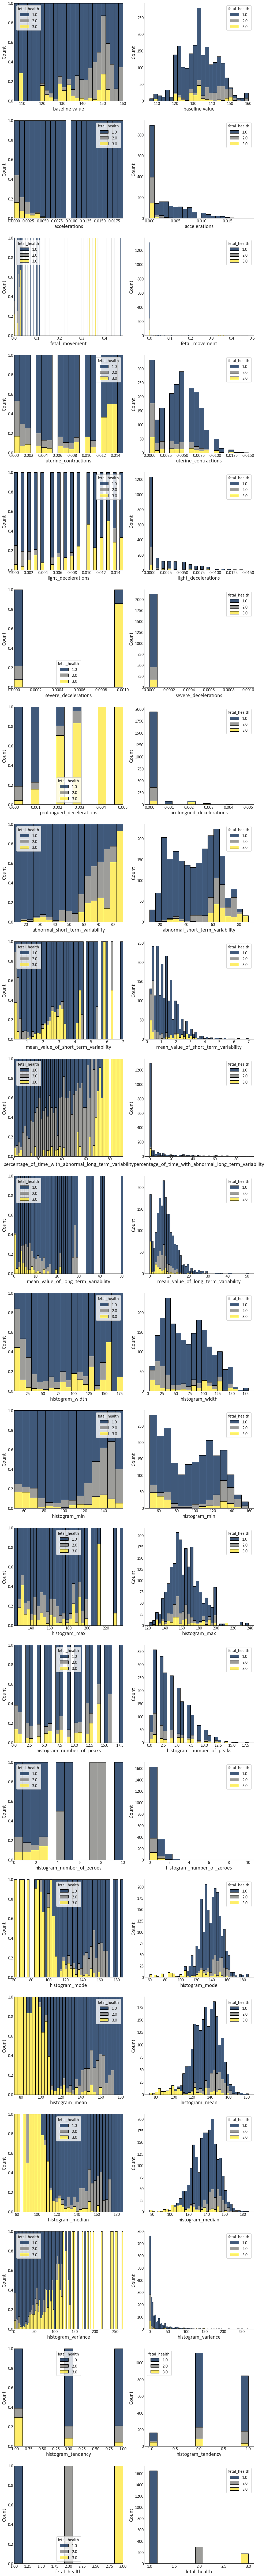

In [14]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=16,8*len(df.columns)
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams['legend.frameon']=True

fig,ax = plt.subplots(nrows=len(df.columns), ncols=2,)
i=0
for feature in df.columns:

    sns.histplot(data = df,
                     x=feature,
                     hue='fetal_health',
                     palette='cividis',
                     multiple='fill',
                    ax=ax[i,0]
                        )

    sns.histplot(data = df,
                     x=feature,
                     hue='fetal_health',
                     palette='cividis',
                     multiple='stack',
                    ax=ax[i,1])
    i+=1
sns.despine()

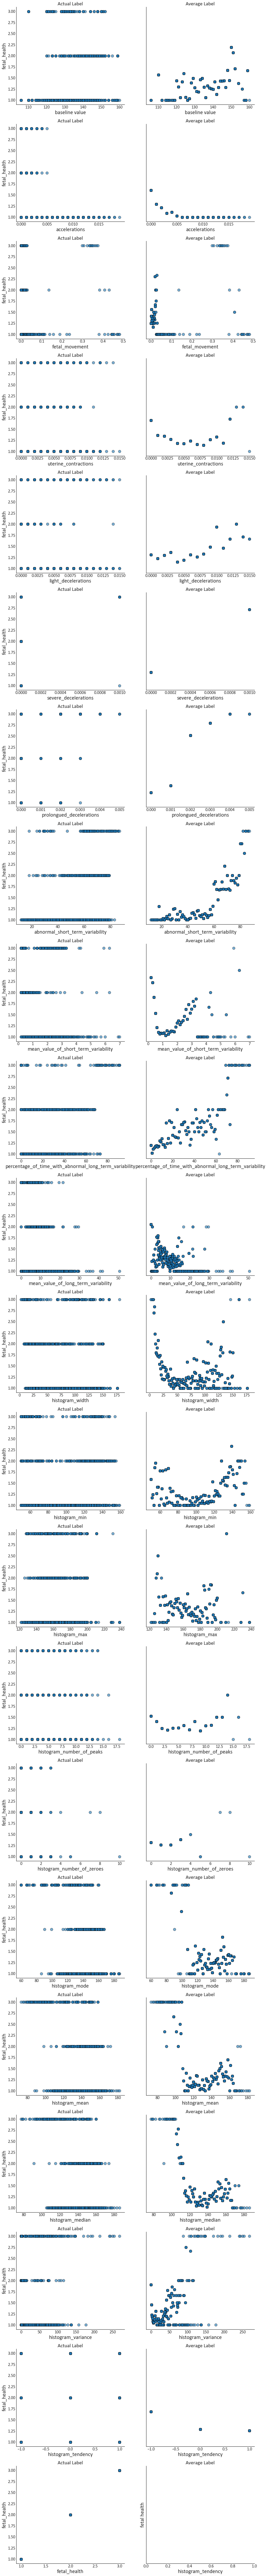

In [12]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=16,8*len(df.columns)
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size']=16
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20

fig,ax = plt.subplots(nrows=len(df.columns),ncols=2,sharey=True)
i=0
for feature in df.columns:
    try:
        ax[i,0].set_title('Actual Label')
        ax[i,1].set_title('Average Label')

        sns.scatterplot(x=df[feature],
                        y=df['fetal_health'],
                        s=100,
                        alpha=0.6,
                        linewidth=1,
                        edgecolor='black',
                        ax=ax[i,0])

        df_data = df
        temp = df_data[df_data[feature].isnull() == False][['fetal_health',feature]]
        temp['fetal_health'].replace([False, True], [0,1], inplace = True)
        temp['fetal_health'] = temp.groupby(feature)['fetal_health'].transform('mean')
        plt.xlabel(feature)
        plt.ylabel('fetal health')
        sns.scatterplot(x=temp[feature],
                        y=temp['fetal_health'],
                        s=100,
                        alpha=0.6,
                        linewidth=1,
                        edgecolor='black',
                        ax=ax[i,1])
    except:
        pass
    i+=1
sns.despine()

In [16]:
x = df.drop('fetal_health',axis=1)
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [17]:
y = df['fetal_health']
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [19]:
x_train.shape,y_train.shape

((1488, 21), (1488,))

In [20]:
x_test.shape,y_test.shape

((638, 21), (638,))

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
lr.score(x_train,y_train)

0.8696236559139785

In [25]:
lr.score(x_test,y_test)

0.85423197492163

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
y_pred=lr.predict(x_test)

In [29]:
accuracy_score(y_pred,y_test)

0.85423197492163

In [31]:
confusion_matrix(y_pred,y_test)

array([[481,  61,   7],
       [  8,  29,   7],
       [  7,   3,  35]], dtype=int64)